From https://camb.readthedocs.io/en/latest/CAMBdemo.html

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import sympy

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
sys.path.append("/home/isidro/Documents/github/CAMB/")
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/isidro/anaconda3/lib/python3.8/site-packages/camb-1.3.5-py3.8.egg/camb


In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [4]:
type(pars)

camb.model.CAMBparams

In [5]:
#calculate results for these parameters
results = camb.get_results(pars)

In [12]:
results.hubble_parameter(z=100)

39120.79836805969

In [13]:
results.hubble_parameter(z=0)

67.4999999999868

In [14]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2551, 4)


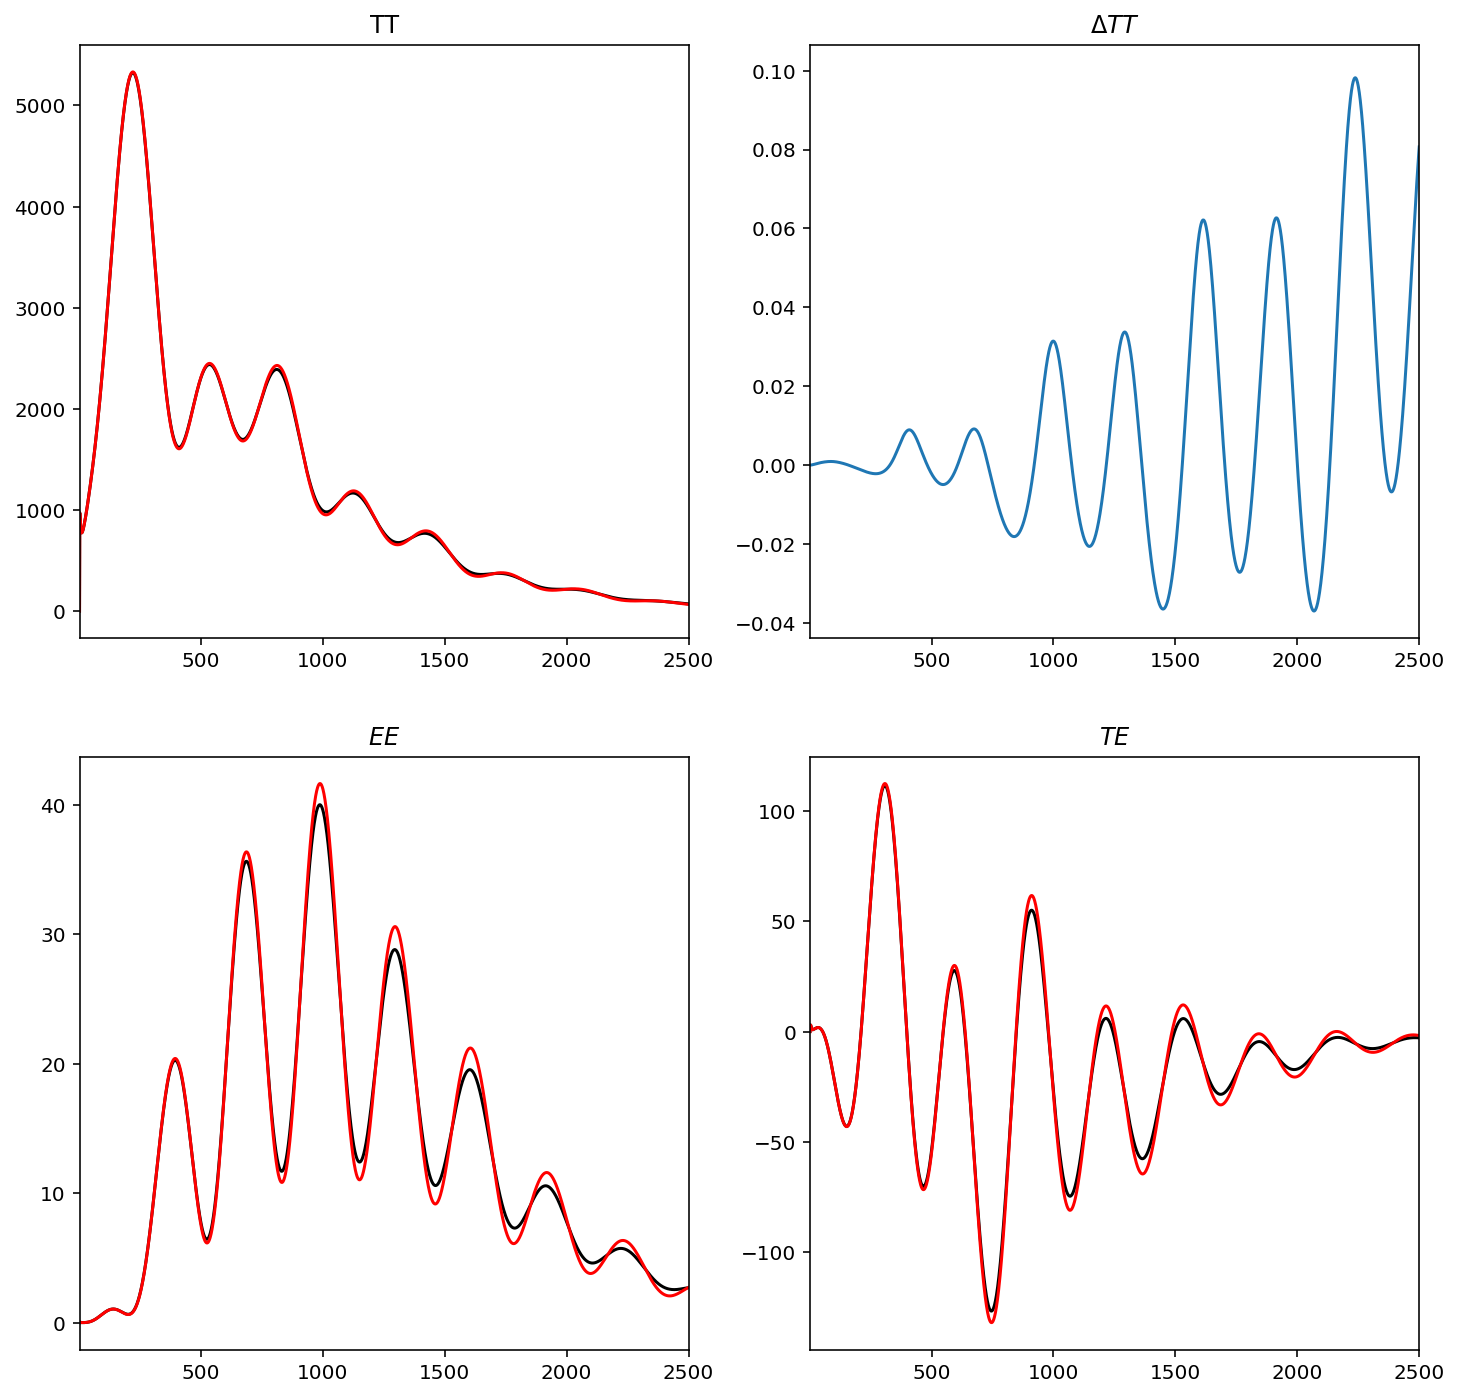

In [15]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500])

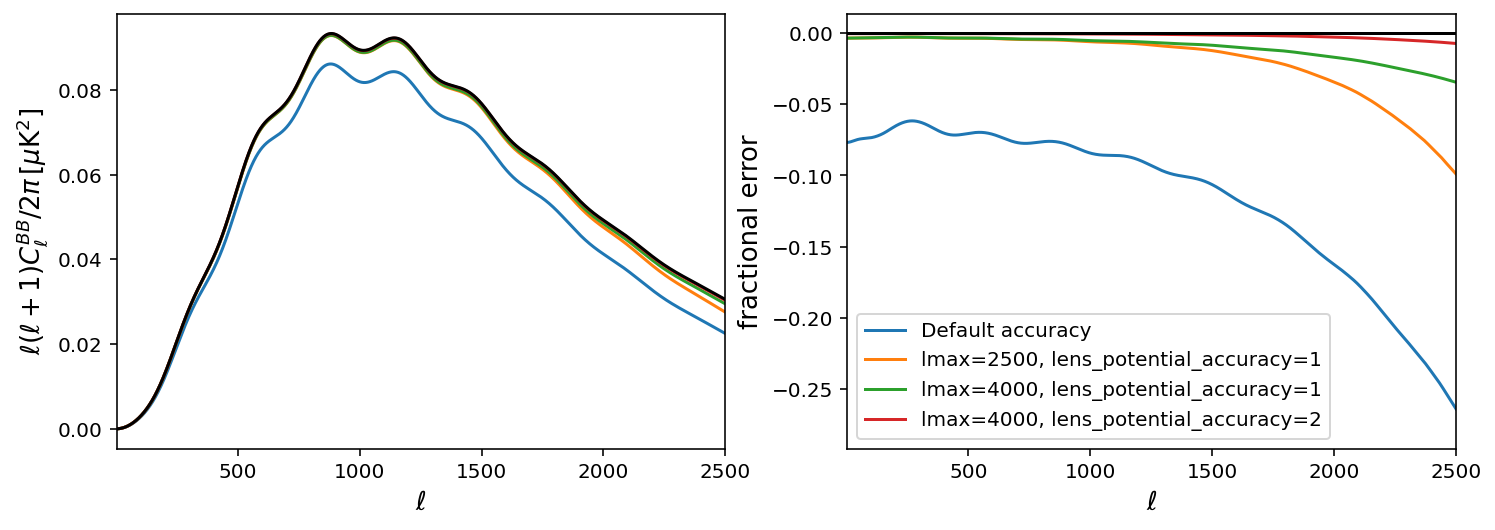

In [16]:
# The lensing B modes are non-linear, so need to be calculated carefully if you want them accurate (even at low ell)
# Need both high lmax, non-linear lensing and high k 
# lens_potential_accuracy=1 turns on the latter, and can be increased to check precision

pars.set_for_lmax(2500, lens_potential_accuracy=1)
results = camb.get_results(pars)
lmax2500CL = results.get_lensed_scalar_cls(CMB_unit='muK')
                  
pars.set_for_lmax(4000, lens_potential_accuracy=1)
results = camb.get_results(pars)
lmax4000CL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(4000, lens_potential_accuracy=2)
results = camb.get_results(pars)
accCL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(6000, lens_potential_accuracy=4)
results = camb.get_results(pars)
refCL = results.get_lensed_scalar_cls(CMB_unit='muK')

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(ls,totCL[:len(ls),2], color='C0')
ax[0].plot(ls,lmax2500CL[:len(ls),2], color='C1')
ax[0].plot(ls,lmax4000CL[:len(ls),2], color='C2')
ax[0].plot(ls,accCL[:len(ls),2], color='C3')
ax[0].plot(ls,refCL[:len(ls),2], color='k')

ax[0].set_xlim([2,2500])
ax[0].set_xlabel(r'$\ell$',fontsize=13)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell^{BB}/2\pi\,[\mu {\rm K}^2]$', fontsize=13)

ax[1].plot(ls[2:],totCL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C0')
ax[1].plot(ls[2:],lmax2500CL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C1')
ax[1].plot(ls[2:],lmax4000CL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C2')
ax[1].plot(ls[2:],accCL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C3')

ax[1].axhline(0,color='k')
ax[1].set_xlim([2,2500])
ax[1].set_xlabel(r'$\ell$',fontsize=13)
ax[1].set_ylabel('fractional error', fontsize=13);
ax[1].legend(['Default accuracy','lmax=2500, lens_potential_accuracy=1',
           'lmax=4000, lens_potential_accuracy=1','lmax=4000, lens_potential_accuracy=2']);